# M11 Practical Challenge: Decision Tree versus Random Forest Performance 

## Group Members:
- Eli Weiss
- Omar Hussein
- Julian Ruggiero

# Introduction

The world of botany is a one of the most interesting areas in terms of research. Scientists whom study botany and different types of plant now use data science methodologies to enhance their research and provide more insight. In this project we will predict the veil color of mushrooms based of several categorical explanatory variables that describe different aspects of a mushroom.

__Workflow__ <br>
__1)__ Data Profiling <br>
__2)__ Exploratory Data Analysis <br>
__3)__ Data Preparation <br>
__4)__ Preped Data Review <br>
__5)__ Modeling <br>
__6)__ Post-Modeling Exploratory Data Analysis <br>
__7)__ Select Models <br>
__8)__ Conclusions <br>

# Data Profiling

We will use a decision tree and a random forest to try and predict the Veil Color of a mushroom. The data set contains 8124 observations and 23 attributes of nominal data. More information about the data can be found at: [Link](https://archive.ics.uci.edu/ml/datasets/mushroom) <br>

- __Poison:__                    p= poisenous e = edible
- __cap-shape:__                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- __cap-surface:__              fibrous=f,grooves=g,scaly=y,smooth=s
- __cap-color:__                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- __bruises?:__                 bruises=t,no=f
- __odor:__                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- __gill-attachment:__          attached=a,descending=d,free=f,notched=n
- __gill-spacing:__             close=c,crowded=w,distant=d
- __gill-size:__                broad=b,narrow=n
- __gill-color:__               black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- __stalk-shape:__              enlarging=e,tapering=t
- __stalk-root:__               bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- __stalk-surface-above-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __stalk-surface-below-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __stalk-color-above-ring:__   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- __stalk-color-below-ring:__   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- __veil-type:__                partial=p,universal=u
- __veil-color (response):__               brown=n,orange=o,white=w,yellow=y
- __ring-number:__              none=n,one=o,two=t
- __ring-type:__                cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- __spore-print-color:__        black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- __population:__               abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- __habitat:__                  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Exploratory Data Analysis

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import os
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
columns = ['Poison','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment'
               ,'gill_spacing','gill_size','gill_color','stalk_shape','stalk_root',
              'stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring'
              ,'stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type'
               ,'spore_print_color','population','habitat']

In [3]:
#loading the data set
df=pd.read_csv("https://raw.githubusercontent.com/enwweiss/DAV-6150/master/M11_Data.csv", 
                names  = columns
              , header = None)

#sanity check
df.head()

,Poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#checking data types on raw data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Poison                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

We can see that there are not any null values in any of the columns. Replacing the single letter abbreviations used in the data with more descriptive character strings

In [5]:
# replace Edible col values
df.Poison.replace({'e': 'edible', 'p': 'poison'}, inplace = True)

# replace Cap Shape col values
#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
df.cap_shape.replace({'b': 'bell', 'c': 'conical', 'x': 'convex',
                      'f': 'flat', 'k': 'knobbed', 's': 'sunken'}, inplace = True)

# replace Cap Surface col values
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
df.cap_surface.replace({'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},  inplace = True)

# replace Cap Color col values
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
df.cap_color.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                      'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                      'w': 'white', 'y': 'yellow'}, inplace = True)

#replace Bruises col values
#bruises: bruises=t,no=f
df.bruises.replace({'t': 'yes', 'f': 'no'}, inplace = True)

#replace Odor col values
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
df.odor.replace({'a': 'almond', 'l': 'anise', 'c': 'creosote', 
                'y': 'fishy', 'f': 'foul', 'm': 'musty', 
                'n': 'none', 'p': 'pungent', 's': 'spicy'}, inplace = True)

#replace Gill Attachment col values
#gill-attachment: attached=a,descending=d,free=f,notched=n
df.gill_attachment.replace({'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}, inplace = True)

#gill-spacing: close=c,crowded=w,distant=d
df.gill_spacing.replace({'c': 'close', 'w': 'crowded', 'd': 'distant'}, inplace = True)

#gill-size: broad=b,narrow=n
df.gill_size.replace({'b': 'broad', 'n': 'narrow'}, inplace = True)

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
df.gill_color.replace({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
                      'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
                      'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

#stalk-shape: enlarging=e,tapering=t
df.stalk_shape.replace({'e': 'enlarging', 't': 'tapering'}, inplace = True)

#stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
df.stalk_root.replace({'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 
                      'z': 'rhizomorphs', 'r': 'rooted'}, inplace = True)

#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
df.stalk_surface_above_ring.replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}, inplace = True)

#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
df.stalk_surface_below_ring.replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}, inplace = True)

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
df.stalk_color_above_ring.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                                  'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
df.stalk_color_below_ring.replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 
                                  'g': 'gray', 'o': 'orange', 'p': 'pink', 
                                  'e': 'red', 'w': 'white', 'y': 'yellow'}, inplace = True)

#veil-type: partial=p,universal=u
df.veil_type.replace({'p': 'partial', 'u': 'universal'}, inplace = True)

#veil-color: brown=n,orange=o,white=w,yellow=y
df.veil_color.replace({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}, inplace = True)

#ring-number: none=n,one=o,two=t
df.ring_number.replace({'n': 'none', 'o': 'one', 't': 'two'}, inplace = True)

#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
df.ring_type.replace({'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
                     'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}, inplace = True)

#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
df.spore_print_color.replace({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 
                             'r': 'green', 'o': 'orange', 'u': 'purple', 
                             'w': 'white', 'y': 'yellow'}, inplace = True)

#population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
df.population.replace({'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 
                      's': 'scattered', 'v': 'several', 'y': 'solitary'}, inplace = True)

#habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
df.habitat.replace({'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
                   'u': 'urban', 'w': 'waste', 'd': 'woods'}, inplace = True)

Now we will perform first EDA on the response.

In [6]:
#get response counts and percentages
df_response = df.veil_color.value_counts().to_frame('occurences')
df_response['%_occurences'] = df_response.occurences / df.shape[0]
df_response

,occurences,%_occurences
white,7924,0.975382
orange,96,0.011817
brown,96,0.011817
yellow,8,0.000985


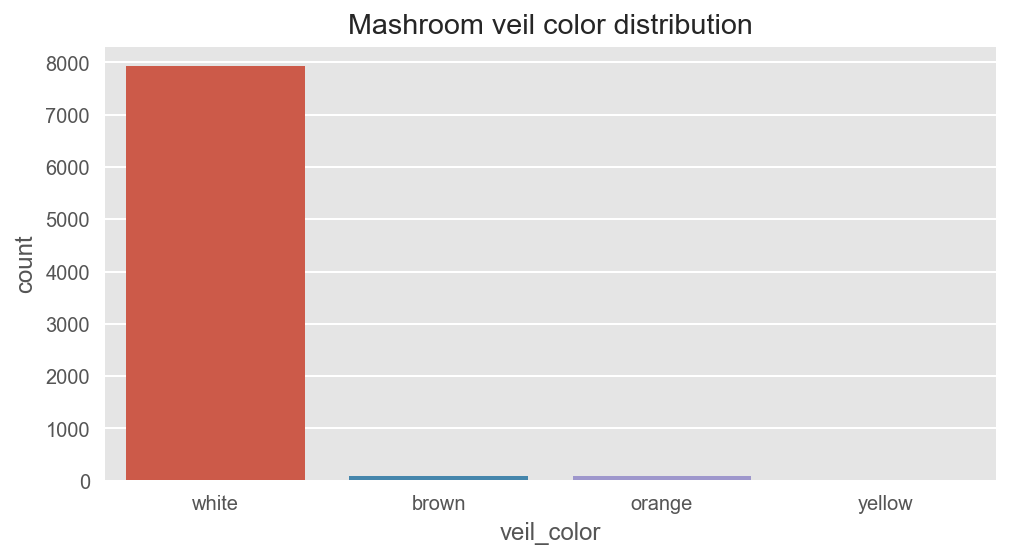

In [7]:
sns.countplot(x = 'veil_color', data = df).set_title("Mashroom veil color distribution");

We can see a highly imbalance response variable, where 97,5% of records correspond to mushrooms with a white veil color, followed by brown and orange with 0.01% each, and finally yellow with only 0.001%. <br>
Given the fact that it is imbalance accuracy is not the best metric since we have a null error rate of 0,975.

Before making any changes let's look at the impact of each of them with the response (veil-color)

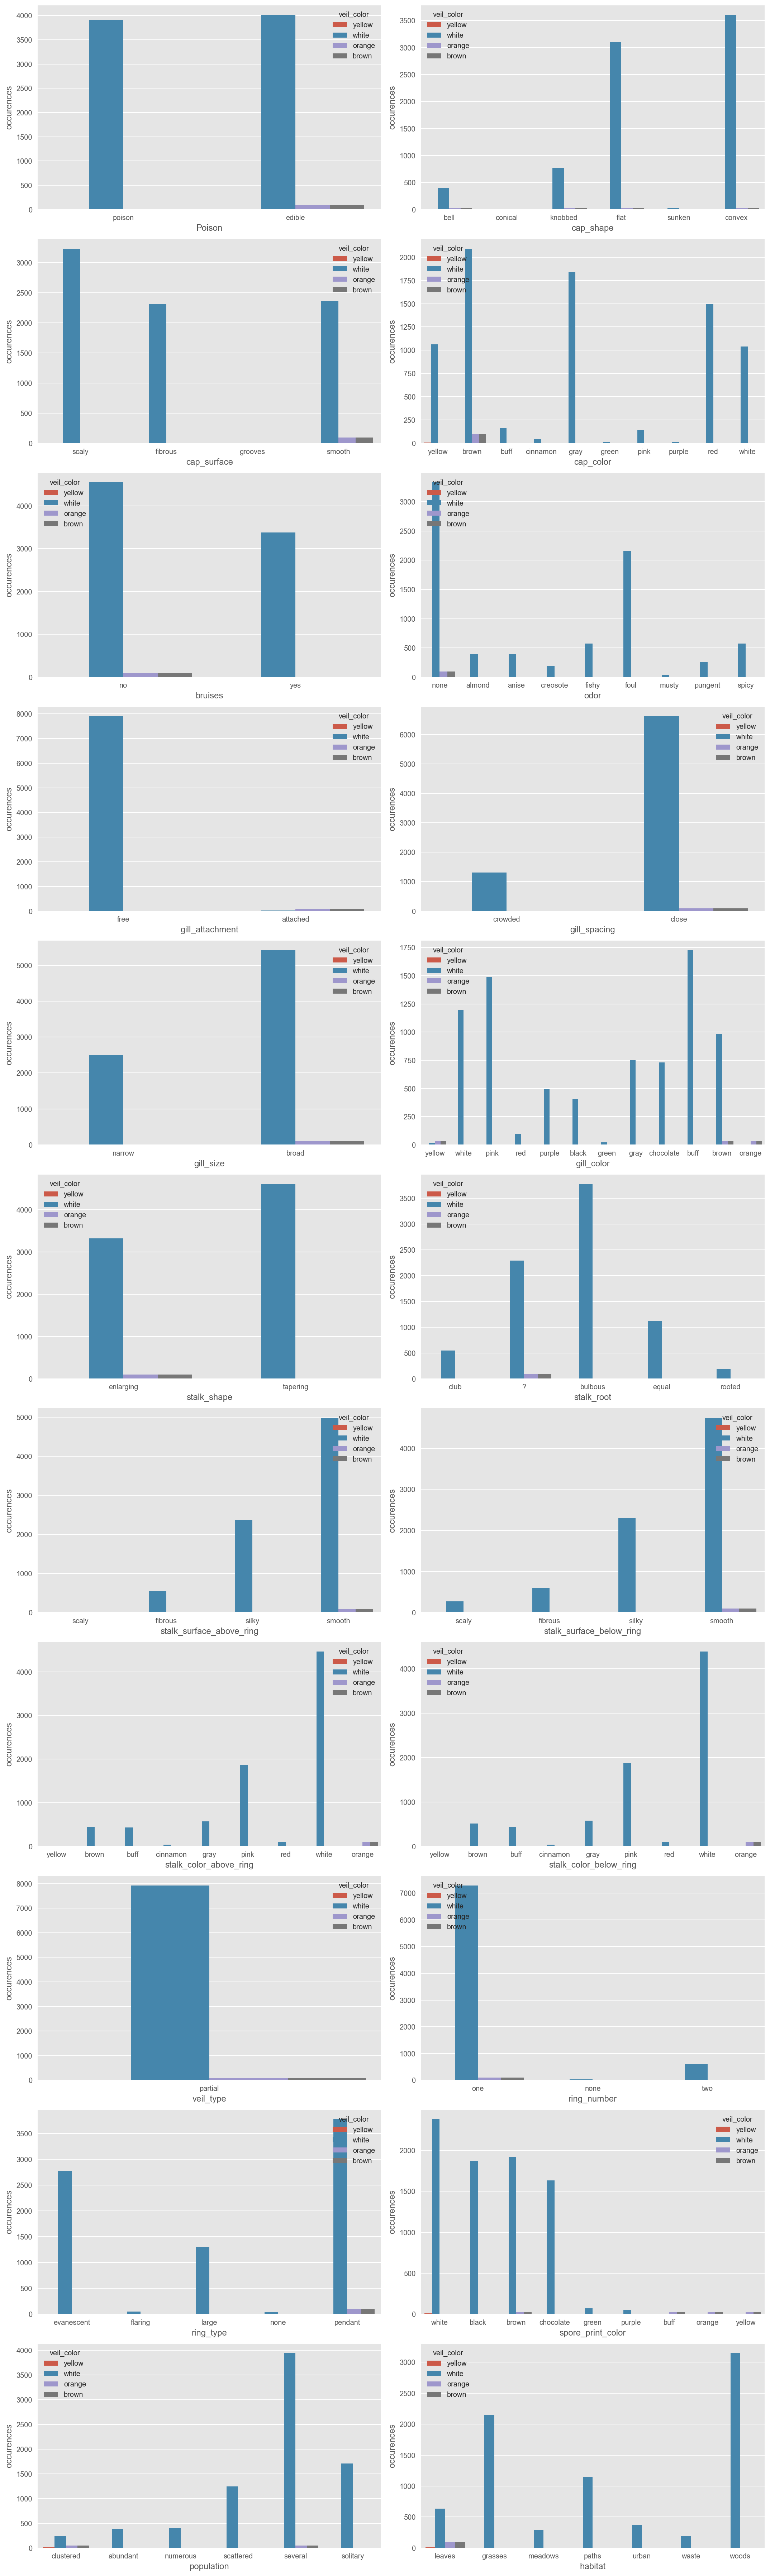

In [8]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,50))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in df.columns: #for each numeric column in the dataframe
    if k == 'veil_color':
        continue
    plt.subplot(11,2,j)
    dt = df.groupby([k,'veil_color']).size().to_frame('occurences').reset_index().sort_values(by='veil_color', ascending=False)
    sns.barplot(x=k, y='occurences', hue='veil_color', data=dt)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

From this graphs we can see that there are a high number of attributes that seem to be good predictor s for veil type. For example:
- Poison (only edible seems to have other veil color than white)
- Cap_surface (only smooth seems to have other veil color than white)
- Cap_color (only brown seems to have other veil color than white)
- Bruises (only when there are no bruises there seems to be other veil color than white)
- Odor (only mushrooms with none odor seems to have other veil color than white)

Similar situation happens with gill_attachment, gill_size, gill_color, stalk_shape, stalk_color, ring_number and ring_type, where for a specific value in this features the mashroom has a different color than white.

For stalk_root the only value that have mushrooms with different color than white is unknown, as we can see the question mark '?'.

We can also see that stalk_surface_above_ring and stalk_surface_below_ring seem to have very similar distribution with the response, so for decision trees and random forests we might want to reduce the linear relationship by only taking one of these 2 attributes. Same between stalk_color_above_ring and  stalk_color_below_ring.

Another finding is that we see what looks to be very similar (if not the same) distribution between orange and brown veil color, and we will investigate that.

In [9]:
brown_df = df[df.veil_color == 'brown'].copy()
brown_df.head(2)

,Poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6038,edible,bell,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,brown,clustered,leaves
6040,edible,convex,smooth,brown,no,none,attached,close,broad,orange,...,smooth,orange,orange,partial,brown,one,pendant,brown,several,leaves


In [10]:
orange_df = df[df.veil_color == 'orange'].copy()
orange_df.head(2)

,Poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6375,edible,bell,smooth,brown,no,none,attached,close,broad,orange,...,smooth,orange,orange,partial,orange,one,pendant,orange,several,leaves
6558,edible,convex,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,several,leaves


There seems to be similarities but to confirm lets delete the veil_color column, reset the index and we will perform an order by to the rest of the columns on both data frames.

In [11]:
#delete columns
del brown_df['veil_color']
del orange_df['veil_color']

#reset index and delete the column with the old index
brown_df = brown_df.reset_index()
del brown_df['index']

orange_df = orange_df.reset_index()
del orange_df['index']

#sort both dataframes by all columns
brown_df = brown_df.apply(lambda x: x.sort_values().values)
orange_df = orange_df.apply(lambda x: x.sort_values().values)

In [12]:
#chequing if both dataframe are equal
brown_df.equals(orange_df)

True

We can see that both dataframes are equal, meaning that the explanatory variables would be the same for either brown or orange veil color. If we keep them separate as they are now, then the machine learning model will not be able to assess any differences and probably end up classifying each class as the other, orange as brown and vice versa. We can combine both in a single value for that class. We will do this in the data preparation section.

Before doing data preparation we check the number of missing values in the stalk_root

In [13]:
df['stalk_root'][df['stalk_root'] =='?'].count()

2480

In [14]:
#check if there are other NAs
NA_Count = 0
for i in columns:   
    NA_Count = NA_Count + df[i][df[i] =='?'].count()
print(NA_Count)

2480


There are no other NAs in the data set and considering there is a significant number of records with missing values we will not delete them, rather we will have a class type 'missing' or 'unknown'.


# Data Preparation

### Remove Attribute
Considering veil_type has only one single value 'partial' we can drop the entire column.

In [15]:
df.veil_type.value_counts()

partial    8124
Name: veil_type, dtype: int64

In [16]:
#Drop this attribute since it is homogonous
del df['veil_type']
columns = df.columns.to_list()

### Combining brown and orange colors

Below we define a function to rename the records that have veil_color either 'brown' or 'orange' to 'brown_orange'.

In [17]:
def rename_color(row):
    if any(ext in row['veil_color'] for ext in ['brown','orange']):
        return 'brown_orange'
    return row['veil_color']

df['veil_color'] = df.apply(lambda row: rename_color(row), axis=1)

df.veil_color.value_counts()

white           7924
brown_orange     192
yellow             8
Name: veil_color, dtype: int64

Now we have 3 classes instead of 4 with a brown_orange class with 192 records instead of two separate classes with 96 records each.

### Convert Data to Numeric

We will split this task into 2 parts <br>

__1)__ We will transform the binary columns to 0 and 1 with meaningful name for the 1 according to the column name. <br>
__2)__ Use pandas get_dummies to transform the rest of the categorical nominal attributes.

In [18]:
#change from text to numeric some of the binary columns
df.Poison.replace({'poison': 1, 'edible': 0}, inplace = True)
df.bruises.replace({'yes': 1, 'no': 0}, inplace = True)
df.ring_number.replace({'none': 0, 'one': 1, 'two': 2}, inplace = True)
df.stalk_root.replace({'?': 'missing'}, inplace = True)

#keep track of the columns to create dummies
dummy_columns = columns.copy()
dummy_columns.remove('Poison')
dummy_columns.remove('bruises')
dummy_columns.remove('ring_number')
dummy_columns.remove('veil_color')

In [19]:
df = pd.get_dummies(df, columns=dummy_columns, drop_first=True)
df.head()

,Poison,bruises,veil_color,ring_number,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_grooves,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,1,white,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,white,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,white,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,white,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,white,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepped Data Review
In this section we will show how the response looks like after grouping orange and brown together.

In [20]:
#get response counts and percentages
df_response = df.veil_color.value_counts().to_frame('occurences')
df_response['%_occurences'] = df_response.occurences / df.shape[0]
df_response

,occurences,%_occurences
white,7924,0.975382
brown_orange,192,0.023634
yellow,8,0.000985


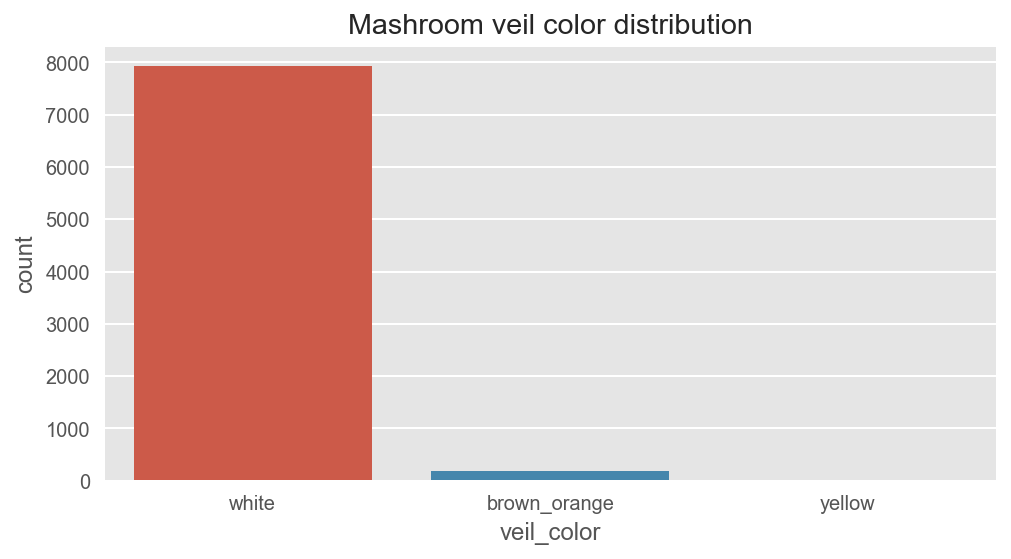

In [21]:
sns.countplot(x = 'veil_color', data = df).set_title("Mashroom veil color distribution");

We can see the new distribution of the response where the new brown_orange has now 192 records. White still has the majority of the observations.

# Decision Tree and Random Forest Modeling

In this section we are going to use a combination of EDA and Univariate feature selection `Chi2` to get 2 set of predictors for our models. After the attributes are identified we will create four models, two decision trees and two random forests using two different set of features. Our first technique is univariate feature selection `Chi2` to test the importance each attribute has in predicting the response.

### Feature selction using `Chi2` and EDA

In this section we use Chi-squared and the knowledge we obtained about the data through our exploratory data analysis phase to make and educated decision on which are the most appropriate features to choose for our machine learning models to predict our response variable veil color.

In [22]:
explanatories = list(df.columns.copy())
explanatories.remove('veil_color')

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 5 features
select_feature = SelectKBest(chi2).fit(df[explanatories],df['veil_color'])

# Created a dictionary.
dic = {}
dic_scores = {}
dic_pvalue = {}
for score, name in zip(select_feature.scores_,df[explanatories].columns):
    dic[name] = score
    dic_scores[name] = score
    
for score, name in zip(select_feature.pvalues_,df[explanatories].columns):
    dic_pvalue[name] = score
    #dic_scores[name] = score
    
# Sorting the dictionary.
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

first10 = {k: dic[k] for k in list(dic)[:18]}
first10

{'stalk_color_above_ring_yellow': 8116.0,
 'stalk_color_above_ring_orange': 7931.999999999998,
 'stalk_color_below_ring_orange': 7931.999999999998,
 'stalk_surface_above_ring_scaly': 2694.9358909641596,
 'stalk_color_below_ring_yellow': 2694.9358909641596,
 'gill_color_orange': 2644.0,
 'gill_color_yellow': 2122.0485777678646,
 'spore_print_color_buff': 1982.9999999999995,
 'spore_print_color_orange': 1982.9999999999995,
 'spore_print_color_yellow': 1982.9999999999995,
 'habitat_leaves': 1613.0785733700927,
 'population_clustered': 1166.0169254981142,
 'cap_shape_conical': 1012.5252397778899,
 'stalk_root_missing': 313.0971063815928,
 'cap_surface_smooth': 295.8608755003519,
 'stalk_surface_below_ring_scaly': 219.84037084699003,
 'gill_attachment_free': 191.56433885368165,
 'odor_none': 151.11827668977733}

Based on our Chi2 and our EDA, we created two sets of predictors that we assume are appropriate. You can see that their common features between the two sets as we believe these features are valuable in terms of predicting our response variable.

However it is important to note that we did not include variables such as stalk_color_above_ring_yellow and stalk_color_below_ring_yellow in the same set despite them having a high `Chi2` score and the reason for that is that we observed collinearity between the two of them previously in our EDA.


In [24]:
features_1 = ['stalk_color_above_ring_yellow', 'stalk_color_above_ring_orange',
              'stalk_surface_above_ring_scaly',
              'gill_color_orange','spore_print_color_yellow']

In [25]:
features_2 = ['stalk_color_below_ring_yellow', 
    'stalk_surface_above_ring_scaly', 'gill_color_orange',
              'gill_color_yellow', 'spore_print_color_buff','spore_print_color_orange','spore_print_color_yellow']

## Decision Trees

In this section we create 2 decision trees and we follow an empirical process as we chose the best parameters for the decision tree using a grid search amongst the parameters that we consider to be promising. We will look for the best combination among the following parameters:
- __class_weight:__ considering we have an imbalance multiclass response, we want to be able to provide appropiate weights to each of them. To do this we define a list of dictionaries, where the first one we provide the weighting to be use the inverse of the class distribution present in the dataset. For example, the class distribution is a 1:42 ratio for the brown_orange class to the majority class and 1:995 for the yellow class to the majority class. The second dictionary provides equal weight to each class.
- __max_depth:__ The maximum depth of the tree. To avoid that the nodes get expanded until all leaves are pure we specify a range between 3 and 10.
- __min_samples_split:__ The minimum number of samples required to split an internal node, as we have a minority class with 8, we specify 2 and 3 for this parameter.

Furthermore, for each tree we define a scorer that we will use for cross-validation, which has the average parameter set to 'macro', which will calculate each class score and then get the average across all classes.


### Model 1: Decision Tree 1

We use the first set of features

In [26]:
#define scorers
f1_scorer = metrics.make_scorer(metrics.f1_score, average = 'macro')
precision_scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
recall_scorer = metrics.make_scorer(metrics.recall_score, average = 'macro')

In [27]:
X = df[features_1]
y = df['veil_color']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y ,test_size = 0.3, random_state = 0)

In [28]:
# Train tree WITH gridsearch
weights = [{'white':1.0, 'brown_orange':42.0, 'yellow':995.0},{'white':1.0, 'brown_orange':1.0, 'yellow':1.0}]

parameters = {'min_samples_split':[2,3], 
              'max_depth':np.arange(3,10),'class_weight':weights}

tr = tree.DecisionTreeClassifier()
grid = GridSearchCV(tr, parameters, scoring=f1_scorer, cv=5)
grid.fit(X_train1, y_train1)
model_est = grid.best_estimator_
model_params = grid.best_params_

In [29]:
grid.best_params_

{'class_weight': {'white': 1.0, 'brown_orange': 42.0, 'yellow': 995.0},
 'max_depth': 3,
 'min_samples_split': 2}

In [30]:
tree1 = tree.DecisionTreeClassifier(class_weight = {'white': 1.0, 'brown_orange': 42.0, 'yellow': 995.0},
 criterion = 'entropy',
 max_depth = 3,
 min_samples_split = 2)
tree1.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight={'brown_orange': 42.0, 'white': 1.0,
                                     'yellow': 995.0},
                       criterion='entropy', max_depth=3)

In [31]:
# Make predictions
train_predictions = tree1.predict(X_train1)
predictions = tree1.predict(X_test1)

Evaluating on the training set

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\omarm\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


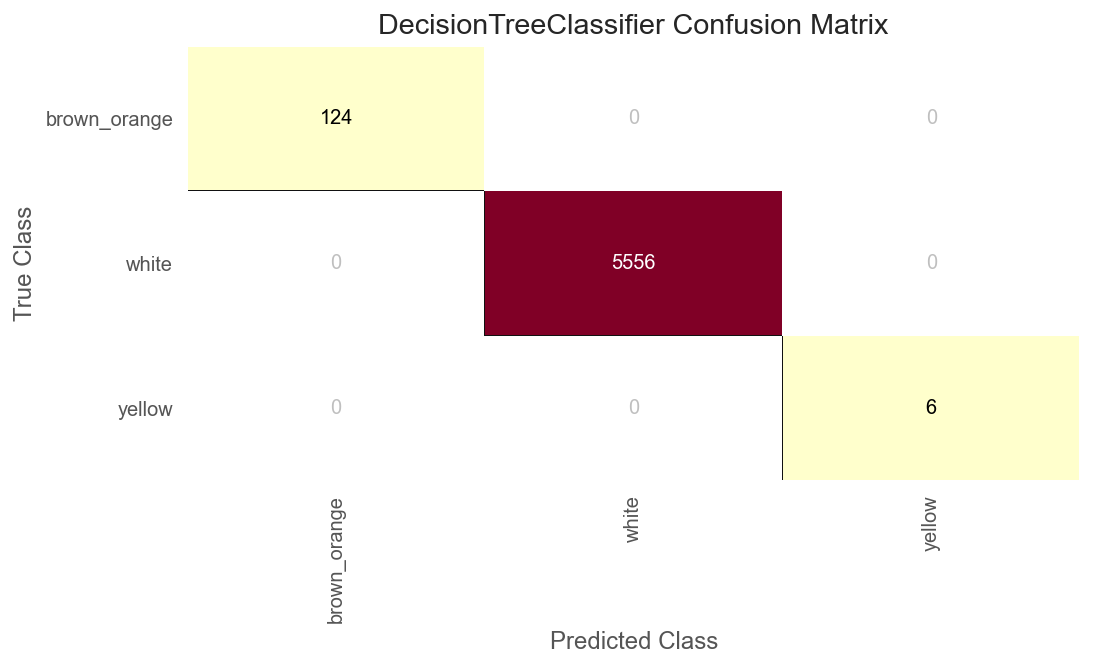

In [32]:
model_cm = ConfusionMatrix(
    tree1, classes=["brown_orange", "white", "yellow"]
)
model_cm.score(X_train1, y_train1)
model_cm.show()

We can see that we have perfect classification in the training set. Next we will see the metrics for each class.

In [33]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train1, labels=["brown_orange", "white", "yellow"])

tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['brown_orange','white','yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,brown_orange,1.0,1.0,1.0,1.0,1.0
1,white,1.0,1.0,1.0,1.0,1.0
2,yellow,1.0,1.0,1.0,1.0,1.0


Now we create a list to collect the metrics across all our models.

In [34]:
# Cross validation.
recall_list = []
f1_list = []
precision_list = []

In [35]:
recall_list.append(np.mean(cross_val_score(tree1,  X_train1, y_train1, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(tree1,  X_train1, y_train1, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(tree1,  X_train1, y_train1, scoring = precision_scorer)))

#### Testing Scores for Model 1: Decision tree 1

We collect the metrics for the testing set.

In [36]:
# Cross validation.
recall_testing = []
f1_testing = []
precision_testing = []

y_pred = tree1.predict(X_test1)
precision_testing.append(np.mean(metrics.precision_score(y_test1,y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test1,y_pred,average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test1,y_pred,average = None)))

#### Tree visualization
In this section we show the classification process of the tree in visual format.

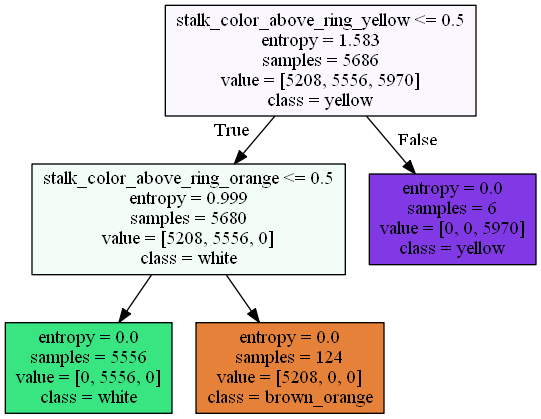

In [37]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
tree.export_graphviz(
    tree1,
    out_file=dot_data,
    proportion=False,
    feature_names=features_1,
    class_names=['brown_orange','white','yellow'],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
Image(g.create_png())

The previous figure illustrates how the decision tree asks a series of question that helps it get closer to correctly identifying the response variable. In the first node of the tree it first asks if the 
stalk color above ring is yellow, if it is not yellow then the response value is yellow otherwise that means it needs further questioning and the next question would be is the stalk color above the ring orange, if it is indeed orange then the value of class is brown/orange otherwise then it is white.

As we can see in the previous figure that the entropy starts out with high value and that is because we are uncertain on what the response category is but as we ask more questions and move down the tree the entropy level starts to decrease depending on how divisive the question is until it reaches the value zero which means that we are 'certain' that our response value is of a specific category.

### Decision Tree 2

We use the second set of features

In [38]:
X = df[features_2]
y = df['veil_color']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y ,test_size = 0.2, random_state = 42)

In [39]:
# Train tree WITH gridsearch
weights = [{'white':1.0, 'brown_orange':42.0, 'yellow':995.0},{'white':1.0, 'brown_orange':1.0, 'yellow':1.0}]

parameters = {'min_samples_split':[2,3], 
              'max_depth':np.arange(3,10),'class_weight':weights}

tr = tree.DecisionTreeClassifier()
grid = GridSearchCV(tr, parameters, scoring=recall_scorer, cv=5)
grid.fit(X_train2, y_train2)
model_est = grid.best_estimator_
model_params = grid.best_params_

In [40]:
grid.best_params_

{'class_weight': {'white': 1.0, 'brown_orange': 42.0, 'yellow': 995.0},
 'max_depth': 6,
 'min_samples_split': 2}

We create the second decision tree with the parameters provided by gridsearch.

In [41]:
tree2 = tree.DecisionTreeClassifier(class_weight = {'white': 1.0, 'brown_orange': 42.0, 'yellow': 995.0},
    criterion = 'entropy',max_depth = 7, min_samples_split = 2)
tree2.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight={'brown_orange': 42.0, 'white': 1.0,
                                     'yellow': 995.0},
                       criterion='entropy', max_depth=7)

In [42]:
train_predictions = tree2.predict(X_train2)

Evaluating on the training set

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\omarm\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


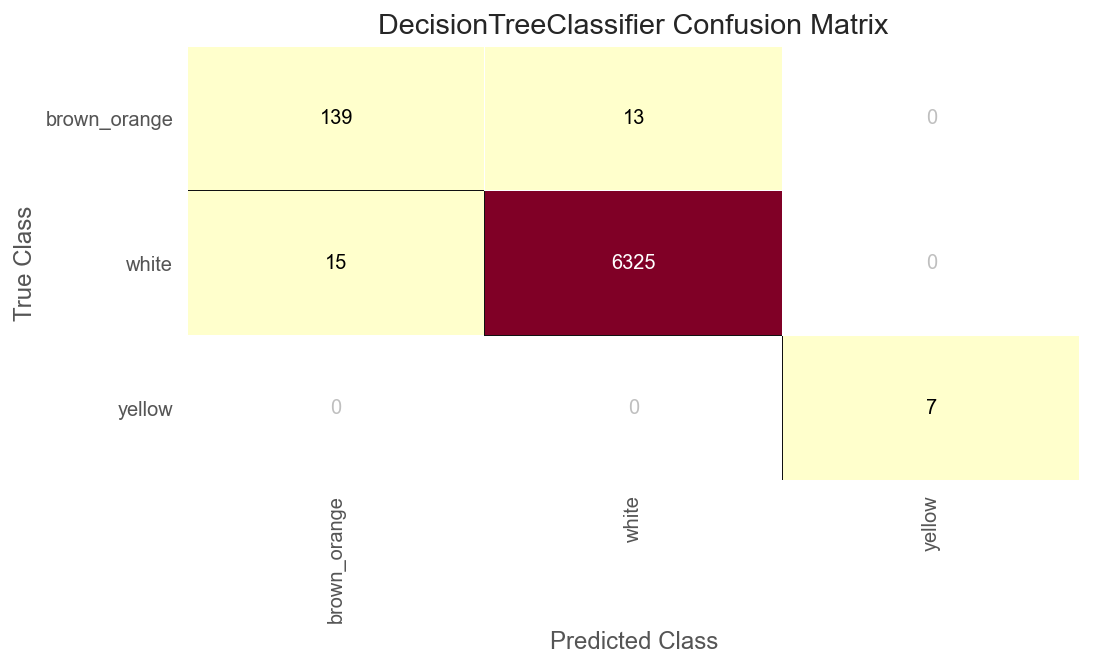

In [43]:
model_cm = ConfusionMatrix(
    tree2, classes=["brown_orange", "white", "yellow"]
)
model_cm.score(X_train2, y_train2)
model_cm.show()

In [44]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train2, labels=["brown_orange", "white", "yellow"])

tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['brown_orange','white','yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,brown_orange,0.997951,0.902597,0.914474,0.908497,0.995692
1,white,0.906832,0.997949,0.997634,0.997791,0.995692
2,yellow,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
recall_list.append(np.mean(cross_val_score(tree2,  X_train2, y_train2, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(tree2,  X_train2, y_train2, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(tree2,  X_train2, y_train2, scoring = precision_scorer)))

#### Testing Scores for Model 2: Decision Tree 2

In [46]:
y_pred = tree2.predict(X_test2)
precision_testing.append(np.mean(metrics.precision_score(y_test2,y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test2,y_pred,average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test2,y_pred,average = None)))

##### Tree Visualisation

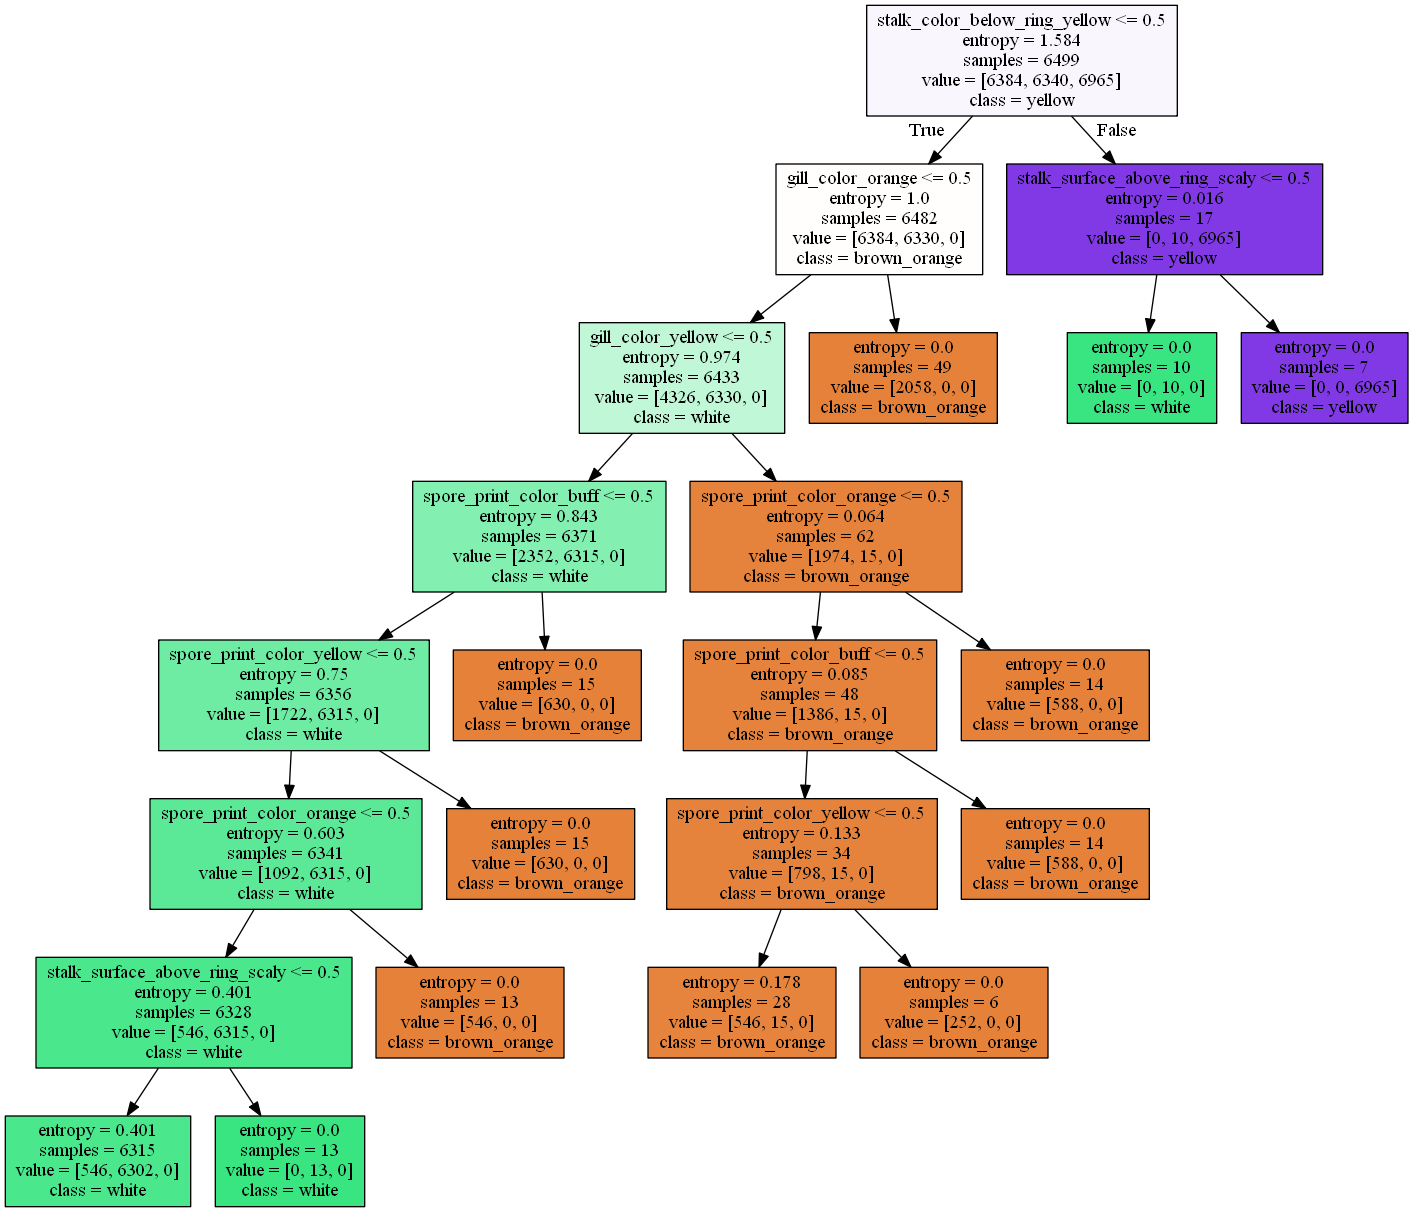

In [47]:
#to allow visualizing the image
#package can be downloaded from https://graphviz.gitlab.io/download/.
#once installed we have to reference the bin folder like below
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
tree.export_graphviz(
    tree2,
    out_file=dot_data,
    feature_names=features_2,
    class_names=['brown_orange','white','yellow'],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
Image(g.create_png())

As we have seen before in decision tree 1, here we find decision tree asking a series of questions to help lower the level of uncertainty (entropy) ideally it would reach zero entropy. This second decision tree has more nodes as we use different predictors than the first one.

## Random Forest
In this section we create 2 Random Forest algorithms. We will use the default sklearn parameters for:
- __n_estimators:__ the number of trees in the forest, which is 100.
- __max_depth:__ we keep the default=None which will allow the nodes to be expanded until all leaves are pure.

We will try with this default parameters, as we already saw good performance in the single decision trees.
We will use the same set of lists to collect the metrics for both, training, and testing set, to allow an easy comparison of our 4 models at the end.


### Random Forest 1

Using the first set of predictors.

In [48]:
from sklearn.ensemble import RandomForestClassifier

X = df[features_1]
y = df['veil_color']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y ,test_size = 0.3, random_state = 0)

rfc_1 = RandomForestClassifier(random_state = 42)
rfc_1.fit(X_train3, y_train3)


recall_list.append(np.mean(cross_val_score(rfc_1,  X_train3, y_train3, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(rfc_1,  X_train3, y_train3, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(rfc_1,  X_train3, y_train3, scoring = precision_scorer)))

In [49]:
train_predictions = rfc_1.predict(X_train3)
predictions = rfc_1.predict(X_test3)

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\omarm\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


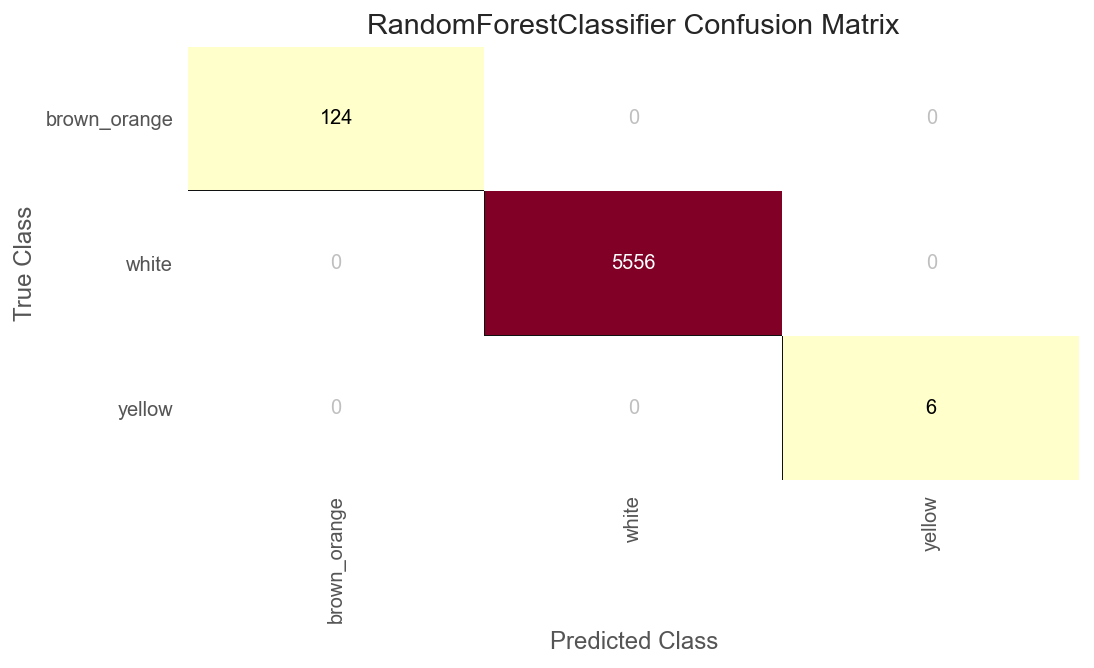

In [50]:
model_cm = ConfusionMatrix(
    rfc_1, classes=['brown_orange', "white", "yellow"]
)
model_cm.score(X_train3, y_train3)
model_cm.show()

We have a perfect classification in the training set.

In [51]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train3, labels=['brown_orange', "white", "yellow"])
tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['brown_orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,brown_orange,1.0,1.0,1.0,1.0,1.0
1,White,1.0,1.0,1.0,1.0,1.0
2,Yellow,1.0,1.0,1.0,1.0,1.0


In [52]:
y_pred = rfc_1.predict(X_test3)
precision_testing.append(np.mean(metrics.precision_score(y_test3,y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test3,y_pred,average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test3,y_pred,average = None)))

### Random Forest 2

Using the second set of predictors.

In [53]:
from sklearn.ensemble import RandomForestClassifier

X = df[features_2]
y = df['veil_color']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y ,test_size = 0.3, random_state = 0)

rfc_2 = RandomForestClassifier(random_state = 42,
                              n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
rfc_2.fit(X_train4, y_train4)


recall_list.append(np.mean(cross_val_score(rfc_2,  X_train4, y_train4, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(rfc_2,  X_train4, y_train4, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(rfc_2,  X_train4, y_train4, scoring = precision_scorer)))

In [54]:
train_predictions = rfc_2.predict(X_train4)
predictions = rfc_2.predict(X_test4)

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\omarm\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


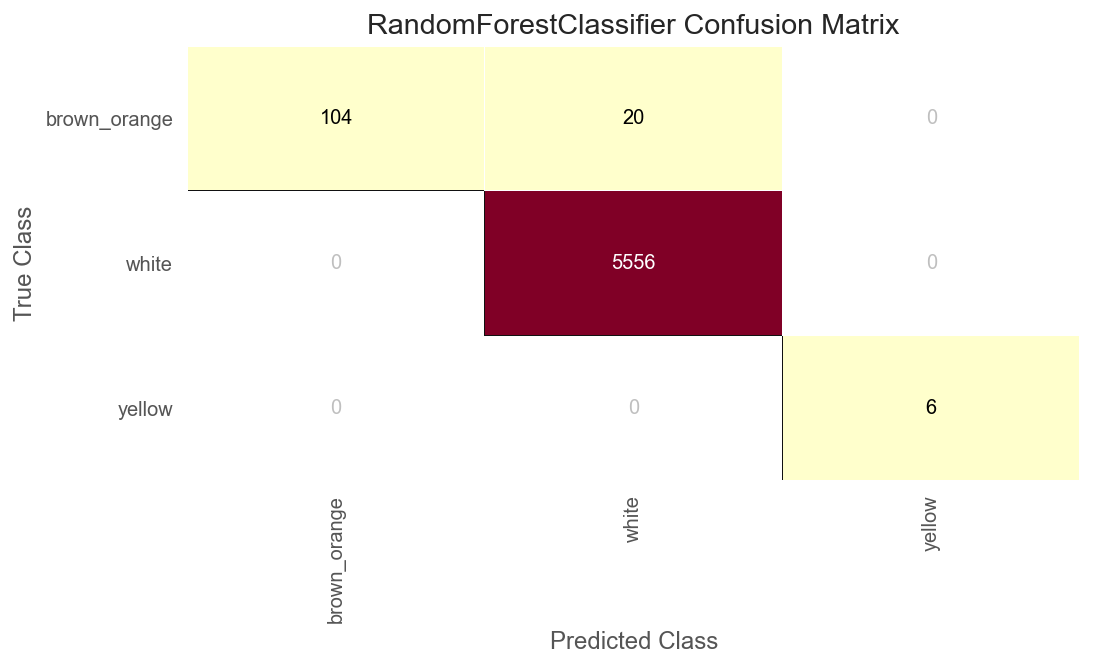

In [55]:
model_cm = ConfusionMatrix(
    rfc_2, classes=['brown_orange', "white", "yellow"]
)
model_cm.score(X_train4, y_train4)
model_cm.show()

We can see that there are some missclassifications for the white color.

In [56]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train4, labels=['brown_orange', "white", "yellow"])
tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['brown_orange','White','Yellow']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,brown_orange,0.996417,1.000000,0.83871,0.912281,0.996483
1,White,1.000000,0.996413,1.00000,0.998203,0.996483
2,Yellow,1.000000,1.000000,1.00000,1.000000,1.000000


In [57]:
y_pred = rfc_2.predict(X_test4)
precision_testing.append(np.mean(metrics.precision_score(y_test4,y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test4,y_pred,average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test4,y_pred,average = None)))

## Model Selection

In this section we look closer at the metrics we collected and create a table for training set and one for testing set.

In [58]:
print("\t  The Model Metric Matrix for Training")
# Training
metrics_summary_training = pd.DataFrame()
metrics_summary_training['Model #'] = ['Desicion Tree 1', 'Desicion Tree 2','Random Forest 1', 'Random Forest 2']
metrics_summary_training['Predictors'] = [4,7,4,7]
metrics_summary_training['Recall'] = recall_list
metrics_summary_training['Precision'] = precision_list
metrics_summary_training['F1_score'] = f1_list

metrics_summary_testing = pd.DataFrame()
metrics_summary_testing['Model #'] = ['Desicion Tree 1', 'Desicion Tree 2','Random Forest 1', 'Random Forest 2']
metrics_summary_testing['Predictors'] = [4,7,4,7]
metrics_summary_testing['Recall'] = recall_testing
metrics_summary_testing['Precision'] = precision_testing
metrics_summary_testing['F1_score'] = f1_testing

metrics_summary_training

	  The Model Metric Matrix for Training


,Model #,Predictors,Recall,Precision,F1_score
0,Desicion Tree 1,4,1.000000,1.000000,1.000000
1,Desicion Tree 2,7,0.970824,0.968030,0.968773
2,Random Forest 1,4,1.000000,1.000000,1.000000
3,Random Forest 2,7,0.946222,0.998805,0.969942


Evaluating on the test set

In [59]:
print("\t  The Model Metric Matrix for testing")
metrics_summary_testing

	  The Model Metric Matrix for testing


,Model #,Predictors,Recall,Precision,F1_score
0,Desicion Tree 1,4,1.000000,1.000000,1.000000
1,Desicion Tree 2,7,0.974369,0.974369,0.974369
2,Random Forest 1,4,1.000000,1.000000,1.000000
3,Random Forest 2,7,0.941176,0.998319,0.966899


This data is extremely imbalanced in terms of the proportionality between the classes available in the response variable, so for instance the 'white' color seems to be the dominant color in this dataset while other seem to have only a few number of observations, so in order to perform a fair evaluation for this imbalanced data we chose to focus on the following metrics: Recall, Precision and the f1-score to ensure that our model is classifying the minority classes correctly.

- Cross validation vs Testing: 

  It seems like the results are consistent across all the models in terms of the cross-validation and testing as they are usually of by a small value or in some cases they would have the exact same scores such as `Decision Tree 1`, So it seems like it is generalizing correctly.<br>
  
- The best model:
    If we look at the metrics we can clearly see that all the scores for Decision tree 1 and random forest 1 are higher than those of decision 2 and random forest 2, giving us a perfect score in both cross-validation and testing and as we mentioned before that all the metrics are consistent it is safe to choose amongst the highest scoring models. Since both decision tree 1 and random forest 1 provide the same scores throughout we will choose decision tree 1 because it more interpretable and easier to digest and visualize. <br>

- Model disadvantages:
    Having chosen decision tree 1 (model 1) as our model of choice it is important to note that this model is not impervious to miss classifications as the dataset provided was extremely imbalanced and therefore could still potentially perform miss classifications particularly on the minority class.<br>




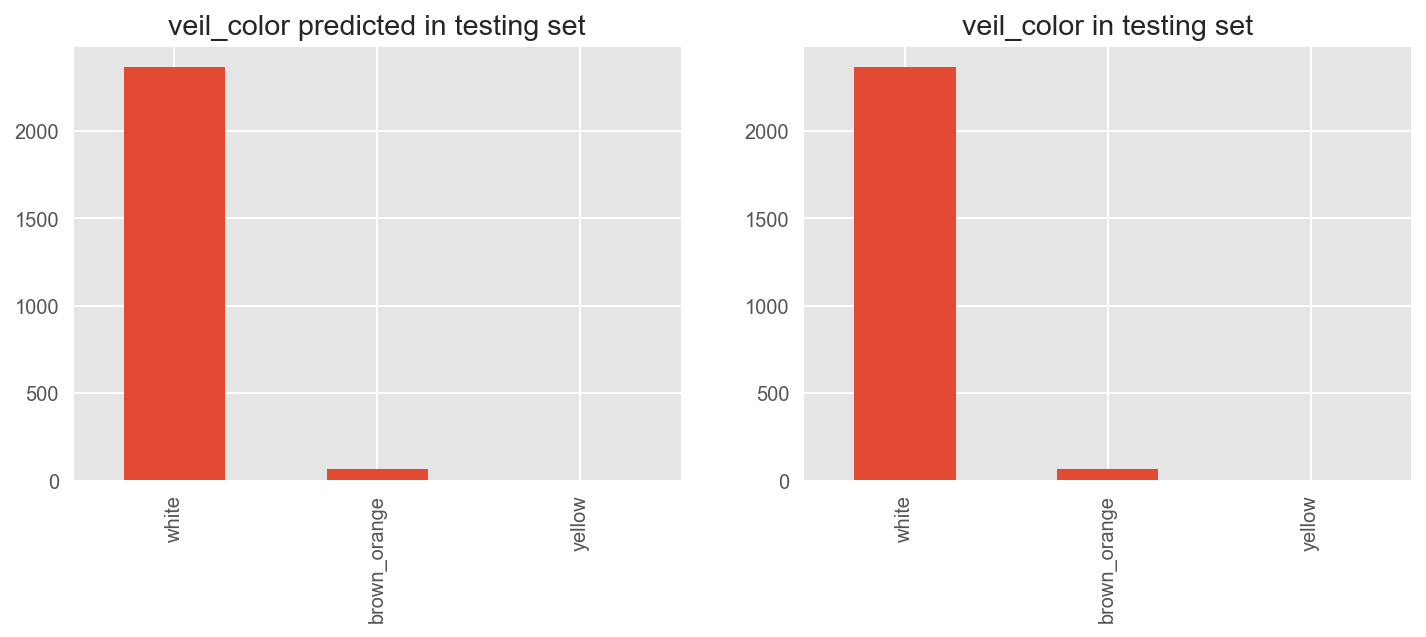

In [60]:
y_pred = tree1.predict(X_test1)
y_pred1 = pd.DataFrame(y_pred, columns=['veil_color'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred1.veil_color.value_counts().plot(kind='bar');
plt.title('veil_color predicted in testing set')
plt.subplot(1,2,2)

y_test1.to_frame().veil_color.value_counts().plot(kind='bar');
plt.title('veil_color in testing set')
plt.show();

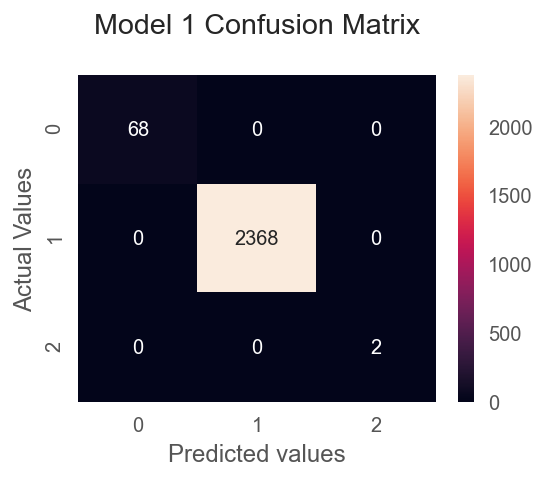

In [61]:
##### Confusion Matrix for Model 3 ####
plt.figure(figsize=(4, 3))
cm_2 = confusion_matrix(y_test1.to_frame(), y_pred1)
sns.heatmap(cm_2,annot=True,fmt="d")
plt.title("Model 1 Confusion Matrix\n")
plt.ylabel('Actual Values')
plt.xlabel('Predicted values')
plt.show();

# Conclusions

- The dataset is highly imbalanced and is more representative of mushrooms that have a white veil color over any other color.
- By simply asking the following 2 questions we were able to classify which veil color a mushroom has.
    - is stalk color above ring yellow?
    - is stalk color above ring orange?

- Stalk color above ring is an extremely good predictor of what the veil color is, as it is better than any other predictor according to our Chi-square scores and our EDA.

- The data set includes 2 colinear pairs, which are 'stack_color_above_ring' and 'stack_color_below_ring'. We decided not to have both together in the same set of features as it would impact the performance of our models. 

- To try to adjust the imbalance nature of the data we used different hyperparameters that provided some flexibility and allowed us to find the best combination for our models’ creation.

- From a model selection perspective, we decided to choose a simple decision tree over a random forest as it is more interpretable and provide an excellent performance in both training and testing set.

- While our Model of choice (Decision tree 1) had perfect F1 , Precision and recall scores in both cross-validation and testing, we think that it is still not impervious to misclassification and this due to the lack of certain observations with specific categories in the response variable (veil color) such as 'yellow'. When we realized that upon completion of this notebook we came up with suggestion that could potentially improve the model, we could use an over-sampling technique such as SMOTE on the dataset to fix this imbalance across all categories in the response variable and if the decision tree still provides perfect scores than our model can be used in production [5].


# Refrences
[1] https://stackoverflow.com/questions/46752650/information-gain-calculation-with-scikit-learn

[2] https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/

[3] https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

[4] https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

[5] https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-106